In [110]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 15s 1us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [9]:
X_train[0].shape

(28, 28)

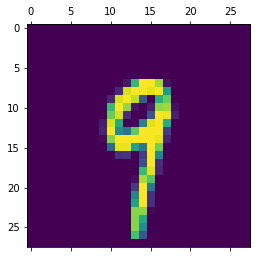

In [18]:
plt.matshow(X_train[600])

In [25]:
y_train.dtype

dtype('uint8')

In [30]:
y_train[600]

9

In [38]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [41]:
X_train.shape

(60000, 28, 28)

In [78]:
X_train = X_train / 255
X_test = X_test / 255

In [87]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flantened = X_test.reshape(len(X_test), 28*28)

In [80]:
X_train_flattened.shape

(60000, 784)

In [81]:
X_test_flantened.shape

(10000, 784)

In [82]:
X_train_flattened.ndim #to check array is 1d or 2d

2

In [83]:
X_train_flattened[0] #we convert 2D into 1D

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4699 - accuracy: 0.8783: 1s - loss: 0.5 - ETA: 0s - loss: 0.5106 - accura - ETA: 0s - loss: 0.4986 - accu - ETA: 0s - los
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [88]:
model.evaluate(X_test_flantened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9252


[0.266379177570343, 0.9251999855041504]

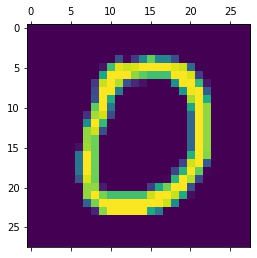

In [98]:
plt.matshow(X_test[10])

In [97]:
y_predicted = model.predict(X_test_flantened)
y_predicted[10]

array([9.9782813e-01, 1.5468159e-07, 3.9840251e-01, 1.0864541e-01,
       7.5208744e-05, 7.9411054e-01, 2.2852123e-02, 4.3493248e-05,
       6.1227381e-01, 6.8825483e-04], dtype=float32)

In [99]:
np.argmax(y_predicted[10])

0

In [103]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [104]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [109]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    3,    3,    0,    7,    6,    3,    3,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,   10,  925,   17,    7,    6,   10,   10,   39,    5],
       [   2,    0,   19,  921,    0,   24,    2,   10,   21,   11],
       [   1,    1,    7,    2,  893,    0,    8,    4,   11,   55],
       [   7,    3,    7,   34,    6,  780,   10,    6,   31,    8],
       [   8,    3,    8,    2,    8,   18,  905,    2,    4,    0],
       [   1,    8,   22,    7,    2,    0,    0,  946,    2,   40],
       [   5,   10,    6,   18,    9,   24,    7,   11,  873,   11],
       [   8,    7,    2,   10,   12,    7,    0,   17,    7,  939]])>

Text(69.0, 0.5, 'Truth')

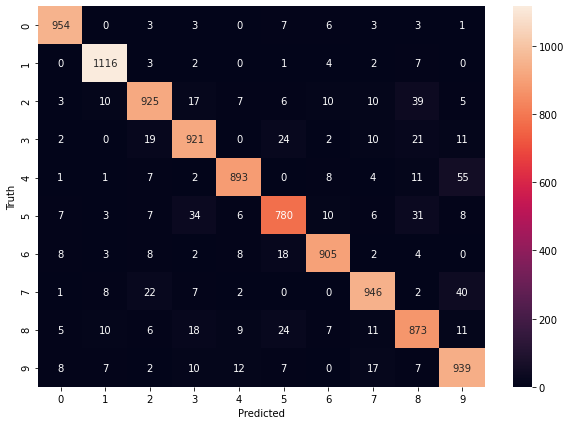

In [111]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add more hidden layers

In [135]:
model = keras.Sequential([
    keras.layers.Dense(250,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2250 - accuracy: 0.9348
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0927 - accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0629 - accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0432 - accuracy: 0.9868: 0s - loss: 0.0435 - 
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0336 - accuracy: 0.9890


In [136]:
model.evaluate(X_test_flantened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9791


[0.07172709703445435, 0.9790999889373779]

In [137]:
y_predicted = model.predict(X_test_flantened)
y_predicted[10]

array([9.9999434e-01, 1.4877611e-07, 7.2071850e-03, 3.4130851e-05,
       3.1008653e-08, 7.9190731e-04, 1.0843933e-02, 1.0867691e-01,
       2.0328711e-05, 8.4329081e-01], dtype=float32)

In [138]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [139]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    0,    0,    2,    4,    3,    2,    3],
       [   0, 1126,    1,    1,    0,    1,    2,    2,    2,    0],
       [   3,    1, 1003,    7,    2,    0,    2,   10,    3,    1],
       [   0,    0,    2,  984,    0,    4,    0,    6,    4,   10],
       [   1,    0,    2,    0,  947,    1,    4,    2,    1,   24],
       [   1,    0,    0,    5,    2,  874,    3,    1,    2,    4],
       [   1,    4,    3,    1,    2,    1,  944,    0,    2,    0],
       [   0,    2,    4,    1,    0,    0,    0, 1016,    0,    5],
       [   4,    1,    2,    6,    4,    5,    3,    4,  937,    8],
       [   1,    2,    0,    2,    3,    2,    0,    4,    0,  995]])>

Text(69.0, 0.5, 'Truth')

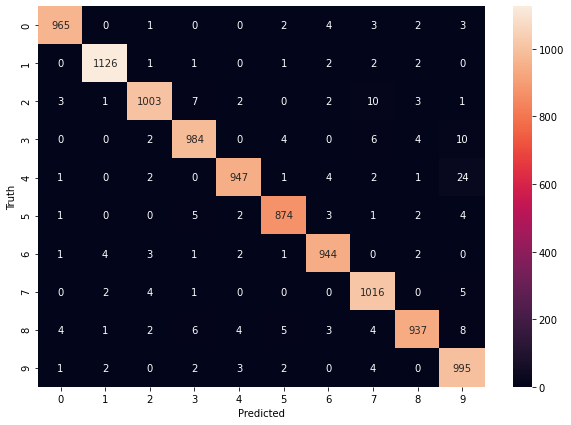

In [140]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')